In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Load and Explore the DataSet

In [4]:
# load the dataset
gapminder = pd.read_csv("gapminder.csv")

In [5]:
gapminder.head(3)

,country,continent,year,life_exp,pop,gdp_per_cap,infant_mortality,fertility
0,Afghanistan,Asia,1952,28.801,8425333.0,779.445314,NaN,NaN
1,Afghanistan,Asia,1957,30.332,9240934.0,820.853030,NaN,NaN
2,Afghanistan,Asia,1962,31.997,10267083.0,853.100710,NaN,NaN


In [ ]:
#Masking Kenya dataset and dropping the columns continent and country
gapminder_kenya = gapminder[gapminder['country'] == 'Kenya'].drop(columns=['continent', 'country']).reset_index(drop=True, inplace=False)

In [7]:
# Displaying the first 4 rows of the gapminder_kenya DataFrame using the head() method
gapminder_kenya.head(4)

,year,life_exp,pop,gdp_per_cap,infant_mortality,fertility
0,1952,42.270,6464046.0,853.540919,NaN,NaN
1,1957,44.686,7454779.0,944.438315,NaN,NaN
2,1962,47.949,8678557.0,896.966373,109.9,8.04
3,1967,50.654,10191512.0,1056.736457,97.1,8.13


In [9]:
gapminder_kenya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              12 non-null     int64  
 1   life_exp          12 non-null     float64
 2   pop               12 non-null     float64
 3   gdp_per_cap       12 non-null     float64
 4   infant_mortality  10 non-null     float64
 5   fertility         10 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 708.0 bytes


##### From above the columns infant_mortality and fertility have missing values

In [ ]:
# Checking for missing values in the gapminder_kenya DataFrame
gapminder_kenya.isna().sum()

year                0
life_exp            0
pop                 0
gdp_per_cap         0
infant_mortality    2
fertility           2
dtype: int64

In [11]:
# Renaming the columns of the gapminder_kenya DataFrame
gapminder_kenya = gapminder_kenya.rename(columns={'year': 'Year',"life_exp": 'Life_Expectancy', 
                                                  "pop": 'Population','gdp_per_cap': 'GDP_USD',
                                                  'infant_mortality': 'Infant_mortality', 
                                                  'fertility': 'Fertility_rate'})

In [12]:
# Calculating the mean of the Infant_mortality and Fertility_rate columns and filling the missing values with the respective means

mean = gapminder_kenya[['Infant_mortality', 'Fertility_rate']].mean()

#Filling in the missing values and updating the DatFrame
gapminder_kenya[['Infant_mortality', 'Fertility_rate']] = gapminder_kenya[['Infant_mortality',
                                                                           'Fertility_rate']].fillna(mean)

In [14]:
# Checking if there are any missing values left
gapminder_kenya.isna().sum()    

Year                0
Life_Expectancy     0
Population          0
GDP_USD             0
Infant_mortality    0
Fertility_rate      0
dtype: int64

### Task 2: Basic Data Analysis

##### Calculating the mean, median and standard deviation of the numerical columns: Infant_mortality ,Fertility_rate, Life_Expectancy, Population and GDP_USD

In [17]:
# Select the relevant numeric columns
cols = ['Infant_mortality', 'Fertility_rate', 'Life_Expectancy', 'Population', 'GDP_USD']

# Compute mean, median, and standard deviation
stats = gapminder_kenya[cols].agg(['mean', 'median', 'std']).transpose()

print(stats)


                          mean        median           std
Infant_mortality  7.505000e+01  7.307500e+01  1.640711e+01
Fertility_rate    6.633000e+00  6.633000e+00  1.240455e+00
Life_Expectancy   5.268100e+01  5.383450e+01  5.596199e+00
Population        1.820625e+07  1.608093e+07  9.971073e+06
GDP_USD           1.200416e+03  1.277564e+03  2.075440e+02


In [21]:
# Group by Year and calculate the mean Fertility_rate for each year
year_fertility = gapminder_kenya.groupby("Year")["Fertility_rate"].mean().reset_index()

print(year_fertility)


    Year  Fertility_rate
0   1952           6.633
1   1957           6.633
2   1962           8.040
3   1967           8.130
4   1972           8.010
5   1977           7.700
6   1982           7.270
7   1987           6.600
8   1992           5.670
9   1997           5.100
10  2002           4.990
11  2007           4.820


### Task 3: Data Visualisation

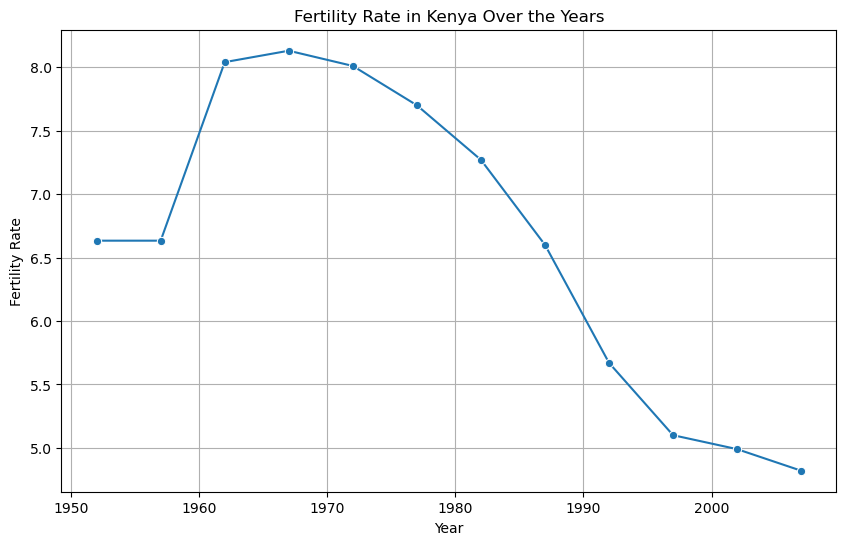

In [22]:
# Line plot for Fertility_rate over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_fertility, x="Year", y="Fertility_rate", marker='o')
plt.title("Fertility Rate in Kenya Over the Years")
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.grid()
plt.show()

/tmp/ipykernel_26375/429420518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gapminder_kenya, x="Year", y="Life_Expectancy", palette="viridis")


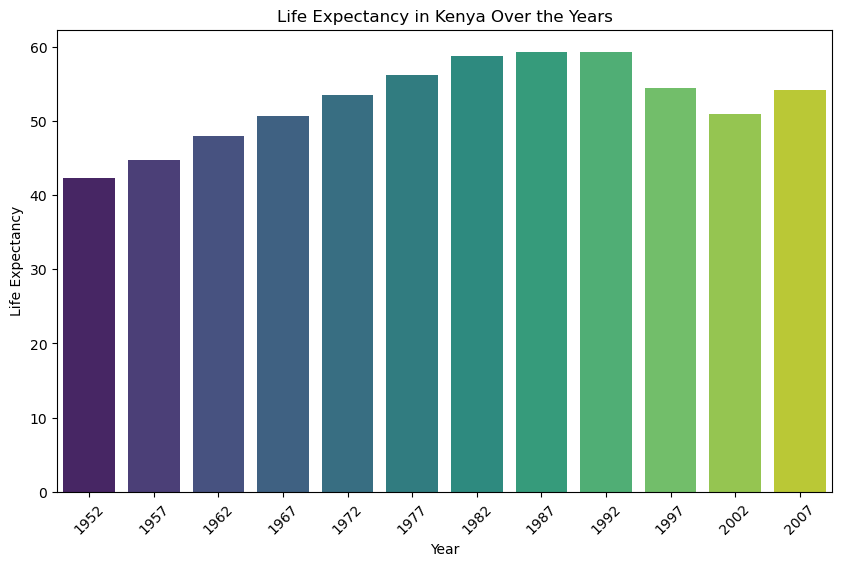

In [23]:
# Bar plot for Life Expectancy by Year
plt.figure(figsize=(10, 6))
sns.barplot(data=gapminder_kenya, x="Year", y="Life_Expectancy", palette="viridis")
plt.title("Life Expectancy in Kenya Over the Years")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.xticks(rotation=45)
plt.show()

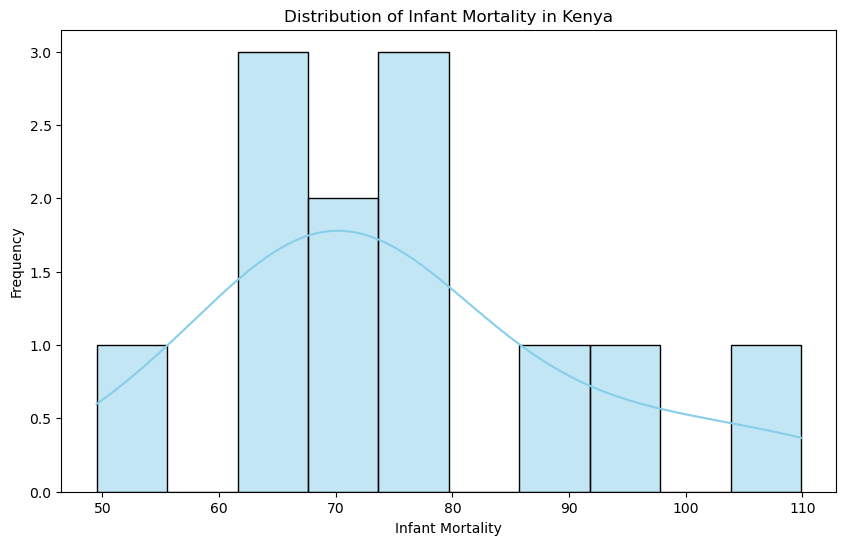

In [24]:
# Histogram for Infant Mortality
plt.figure(figsize=(10, 6))
sns.histplot(gapminder_kenya["Infant_mortality"], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Infant Mortality in Kenya")
plt.xlabel("Infant Mortality")
plt.ylabel("Frequency")
plt.show()

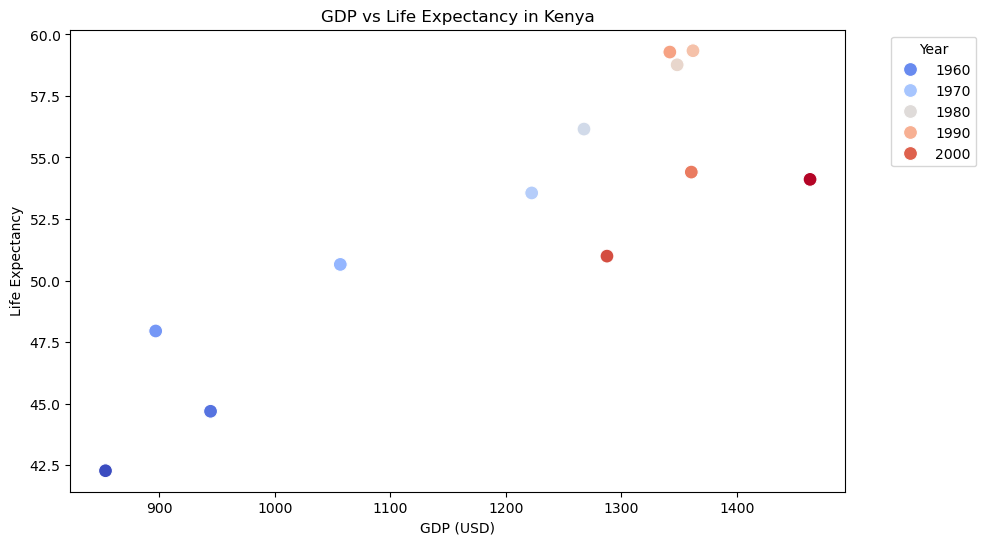

In [25]:
# Scatter plot for GDP vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gapminder_kenya, x="GDP_USD", y="Life_Expectancy", hue="Year", palette="coolwarm", s=100)
plt.title("GDP vs Life Expectancy in Kenya")
plt.xlabel("GDP (USD)")
plt.ylabel("Life Expectancy")
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()